In [17]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from func import *
import json
import ast

In [18]:
df = pd.read_csv("add_haralick.csv")
print(df.shape)
print(df.columns)
df.head()

(6334, 36)
Index(['image_file', 'score', 'width', 'height', 'bbox_size', 'x', 'y',
       'entropy', 'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green',
       'color_var', 'contrast', 'img_size', 'edge_intensity', 'saturation',
       'sift', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM', 'Contrast',
       'Correlation', 'Variance', 'IDM', 'Sum_Average', 'Sum_Variance',
       'Sum_Entropy', 'Entropy', 'Difference_Variance', 'Difference_Entropy',
       'IMC1', 'IMC2'],
      dtype='object')


,image_file,score,width,height,bbox_size,x,y,entropy,laplacian,brightness,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
0,val2017/000000152686.jpg,1.000000,0.261173,0.553906,0.170120,0.370301,0.039649,0.840747,0.073459,0.476461,...,0.227872,0.298608,0.477208,0.232606,0.855056,0.755607,0.042920,0.556602,0.595985,0.934502
1,val2017/000000356505.jpg,0.985369,0.261491,0.397445,0.124918,0.356298,0.145743,0.946316,0.135138,0.602624,...,0.240000,0.074052,0.601585,0.237463,0.949634,0.922784,0.009257,0.783189,0.858163,0.736505
2,val2017/000000127270.jpg,0.984530,0.374936,0.680566,0.291949,0.062589,0.083005,0.884621,0.046253,0.612425,...,0.206256,0.278707,0.612578,0.211425,0.893311,0.776484,0.045202,0.518032,0.535786,0.963085
3,val2017/000000097988.jpg,0.981930,0.180593,0.587337,0.127300,0.312529,0.360089,0.930276,0.227401,0.430184,...,0.228768,0.091846,0.430742,0.220110,0.926829,0.906858,0.011338,0.773311,0.854403,0.734992
4,val2017/000000021879.jpg,0.980656,0.190635,0.330029,0.078072,0.439179,0.133892,0.893484,0.112816,0.682448,...,0.116710,0.072355,0.682315,0.110945,0.891433,0.881906,0.010490,0.748356,0.885905,0.631306


In [19]:
# 정렬 확인
df.score.head(20)

0     1.000000
1     0.985369
2     0.984530
3     0.981930
4     0.980656
5     0.980619
6     0.979154
7     0.977913
8     0.977596
9     0.976612
10    0.974617
11    0.974031
12    0.973683
13    0.973226
14    0.972982
15    0.972758
16    0.972155
17    0.972075
18    0.971785
19    0.971057
Name: score, dtype: float64

In [20]:
high_score = df[df['score']>0.85]
low_score = df[df['score']<0.6]

In [21]:
print("low score", len(low_score))
print("high_score", len(high_score))
print("전체", len(df))

low score 1017
high_score 1729
전체 6334


### 추가된 column
sift

<Axes: title={'center': 'low score SIFT 개수'}>

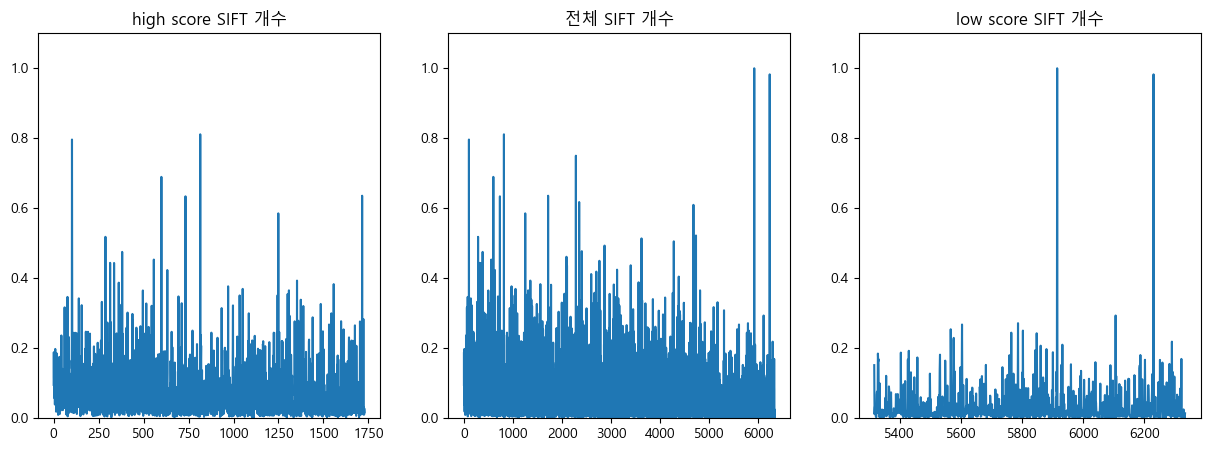

In [22]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("high score SIFT 개수")
plt.ylim(0,1.1)
high_score['sift'].plot()

plt.subplot(1,3,2)
plt.title("전체 SIFT 개수")
plt.ylim(0,1.1)
df['sift'].plot()

plt.subplot(1,3,3)
plt.title("low score SIFT 개수")
plt.ylim(0,1.1)
low_score['sift'].plot()

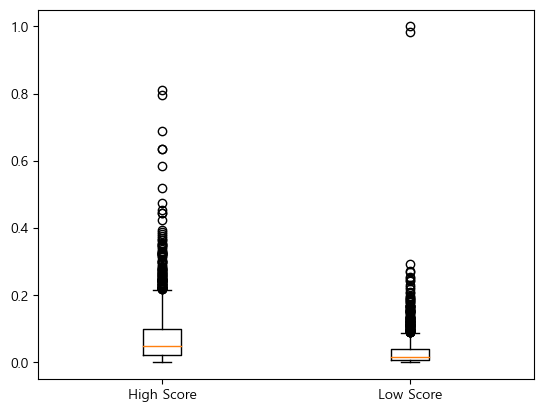

In [23]:
plt.boxplot([high_score['sift'], low_score['sift']], labels=['High Score', 'Low Score'])
plt.show()

In [24]:
print(np.mean(high_score['sift']))
print(np.mean(low_score['sift']))
print(np.mean(df['sift']))

0.07622553738277371
0.03560117338121971
0.057087092767163415


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# 데이터프레임에서 numeric 열만 추출
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_cols]

# 종속 변수(y)와 독립 변수(X) 분리
X = numeric_df.drop('score', axis=1)
y = numeric_df['score']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MinMaxScaler를 사용하여 특성 정규화
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.017759928956586343
R-squared: 0.21365102511740852


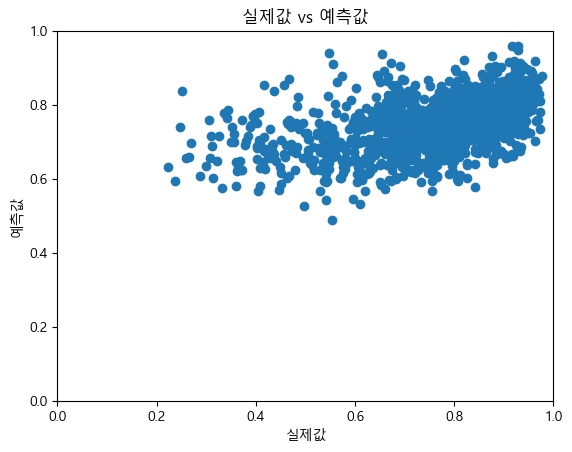

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("실제값 vs 예측값")
plt.show()

In [27]:
# 회귀 모델의 회귀 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.abs().sort_values(ascending=False)

# 영향을 많이 미치는 상위 10개 특성 출력
coefficients.head(10)

Variance        3.304622e+12
Sum_Variance    3.199378e+12
Contrast        3.635530e+11
brightness      3.020227e+01
green           2.070177e+01
red             1.048267e+01
Sum_Average     4.658633e+00
blue            4.118518e+00
entropy         1.888756e+00
Sum_Entropy     1.460525e+00
dtype: float64

Variance, Contrast, brightness, 색조(채도), entropy

In [28]:
numeric_df.columns 

Index(['score', 'width', 'height', 'bbox_size', 'x', 'y', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift',
       'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM', 'Contrast',
       'Correlation', 'Variance', 'IDM', 'Sum_Average', 'Sum_Variance',
       'Sum_Entropy', 'Entropy', 'Difference_Variance', 'Difference_Entropy',
       'IMC1', 'IMC2'],
      dtype='object')

In [14]:
X.describe()

,width,height,bbox_size,x,y,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
count,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,...,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000,6334.000000
mean,0.177723,0.284580,0.089363,0.366576,0.230607,0.873058,0.104311,0.410543,0.452517,0.427268,...,0.251135,0.186201,0.410105,0.253513,0.876284,0.768725,0.029341,0.642175,0.544808,0.932736
std,0.162050,0.210640,0.128201,0.262307,0.176265,0.091872,0.101926,0.157105,0.136998,0.166105,...,0.128765,0.106338,0.157521,0.132838,0.085773,0.091021,0.027909,0.131710,0.151050,0.080049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063471,0.118237,0.011279,0.143174,0.091586,0.838713,0.033958,0.299779,0.362426,0.308474,...,0.157807,0.109326,0.298807,0.156751,0.843072,0.722642,0.013775,0.554548,0.446514,0.914515
50%,0.117965,0.219287,0.033378,0.343127,0.208600,0.896471,0.073232,0.409304,0.453159,0.425643,...,0.234721,0.163236,0.409218,0.235917,0.896883,0.779356,0.022826,0.652424,0.550430,0.957738
75%,0.240638,0.414591,0.114601,0.557572,0.333128,0.935410,0.142695,0.517793,0.544140,0.540065,...,0.327297,0.238841,0.517951,0.330166,0.934540,0.829418,0.036624,0.738521,0.650939,0.980369
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
0.229

0.229